In [32]:
import numpy as np
from skimage.io import imread,imsave
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from collections import Counter
from glob import glob


In [33]:
def plot(image):
    plt.imshow(image, cmap = 'gray')
    plt.show()

In [34]:
def get_posix(image):
    posix = {
        "min_x": [],
        "max_x": [],
        "min_y": [],
        "max_y": []
    }

    #Colunas
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if image[x][y] < 0.5:
                posix['min_x'].append(y)
                break

    for x in range((image.shape[0] - 1), -1, -1):
        for y in range((image.shape[1] - 1), -1, -1):
             if image[x][y] < 0.5:
                posix['max_x'].append(y)
                break

    #Linhas
    for y in range(image.shape[1]):
        for x in range(image.shape[0]):   
            if image[x][y] < 0.5:
                posix['min_y'].append(x)
                break

    for y in range((image.shape[1] - 1), -1, -1):
        for x in range((image.shape[0] - 1), -1, -1):
             if image[x][y] < 0.5:
                posix['max_y'].append(x)
                break
    return posix

In [35]:
#Encontra coluna de pisxel mais repetida 

#detecta quadrados
def positions(arr):
    
    final_posix = {
        "min_x": 0,
        "max_x": 0,
        "min_y": 0,
        "max_y": 0,
    }

    for x in arr:
        data = Counter(arr[x]).items()
        final_posix[x] = max(
            {
                v: k for k, v in dict(data).items()
            }.items()
        )[1]

    return final_posix
    
#Encontra coluna de pisxel mais repetida 


#Detecta outras formas
def other(arr):
    
    return {
        "min_x":  min(arr["min_x"]),
        "max_x":  max(arr["max_x"]),
        "min_y":  min(arr["min_y"]),
        "max_y":  max(arr["max_y"]),
    }
    

In [36]:
def kut(six, image):
    return image[six['min_y']: six['max_y'], six['min_x']: six['max_x']]


In [52]:
def main():
    
    imgs = glob("*.jpg")
    fig, ax = plt.subplots(2,len(imgs), figsize = (30, 15))
    for k, model in enumerate([other, positions]):
        for size, x in enumerate(imgs):
            image = rgb2gray(imread(x))
            posix = get_posix(image)
            posix = model(posix)
            cuted = kut(posix, image)
            ax[k ,size].imshow(cuted, cmap = 'inferno')


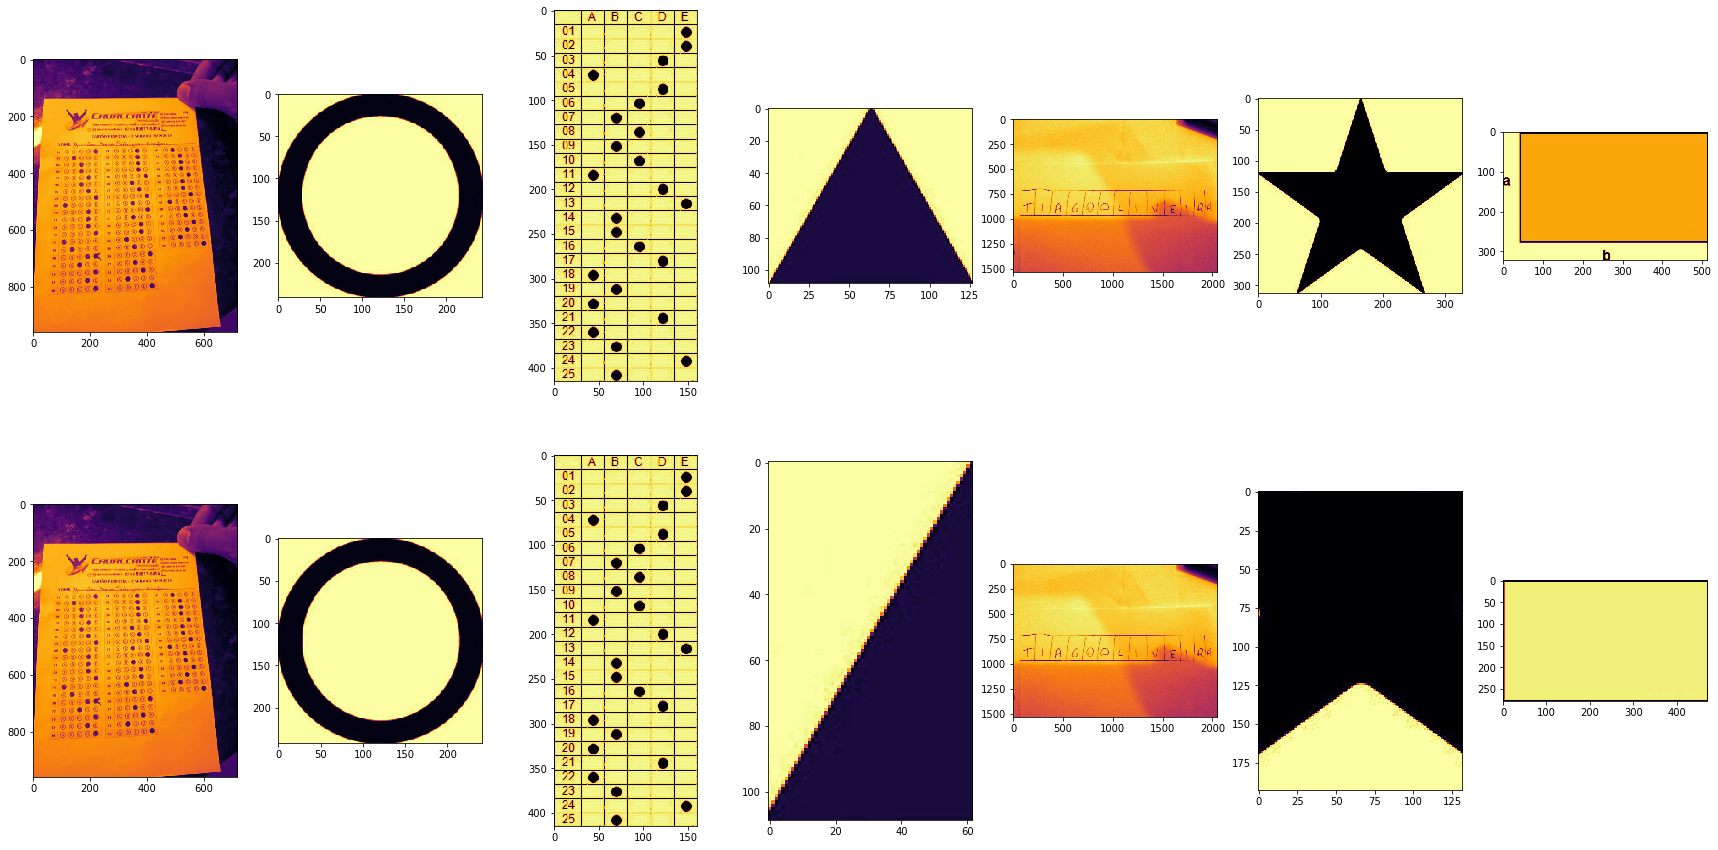

In [53]:
main()